In [9]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load dataset
df = pd.read_csv('../data/pima_diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# preprocess the data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# no null value we don't need to handle null values
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
len(df)

768

In [14]:
# decribe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


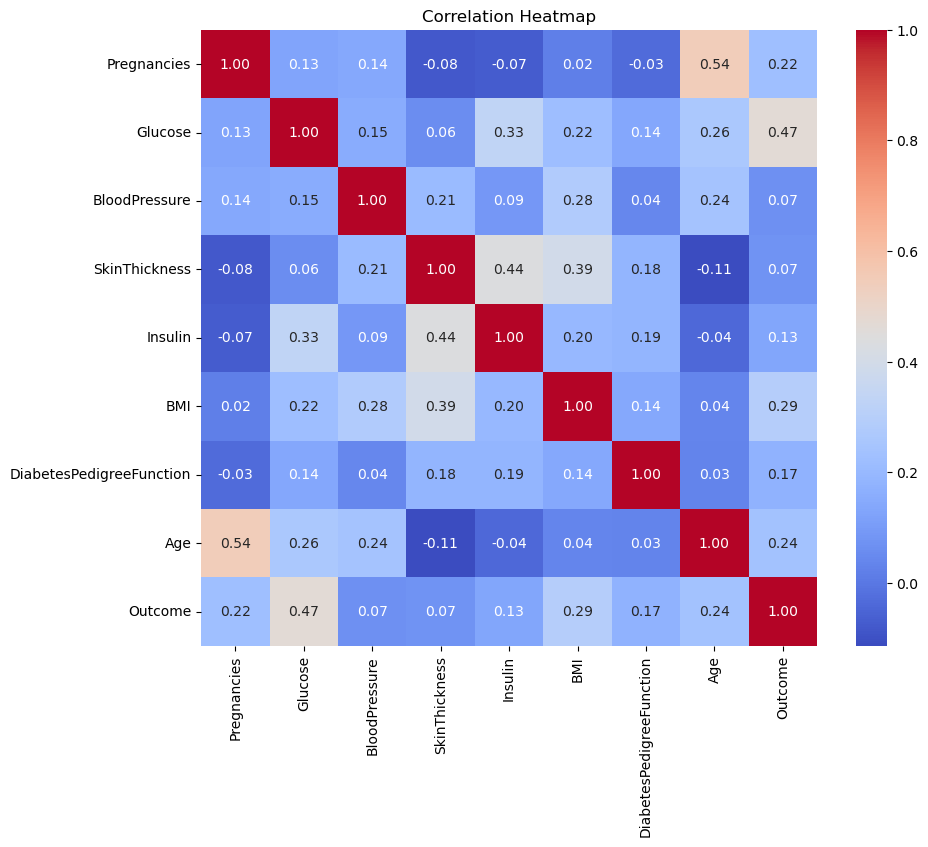

In [15]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


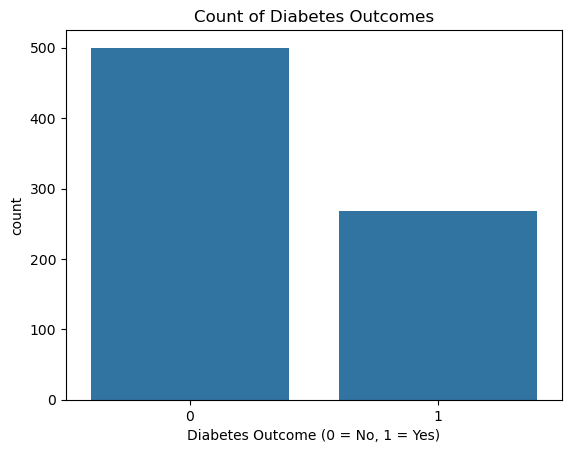

In [16]:
# number of peaople with and without diabetes
sns.countplot(x='Outcome', data=df)
plt.title('Count of Diabetes Outcomes')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.show()

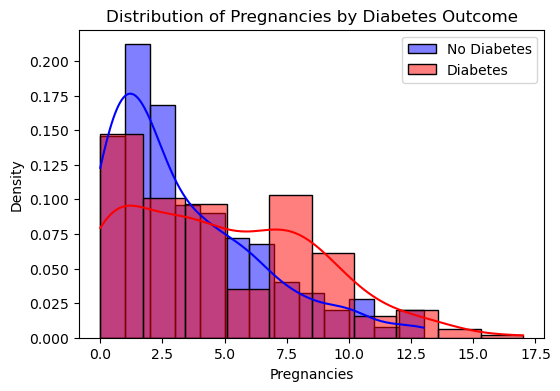

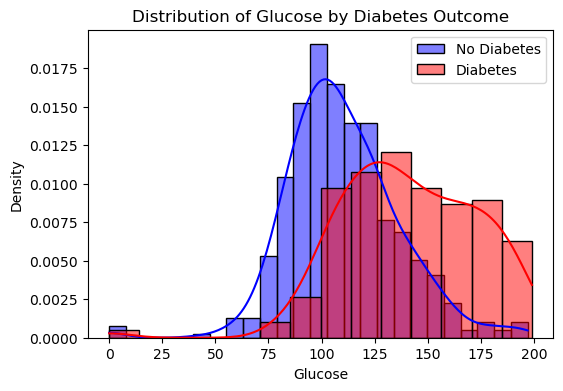

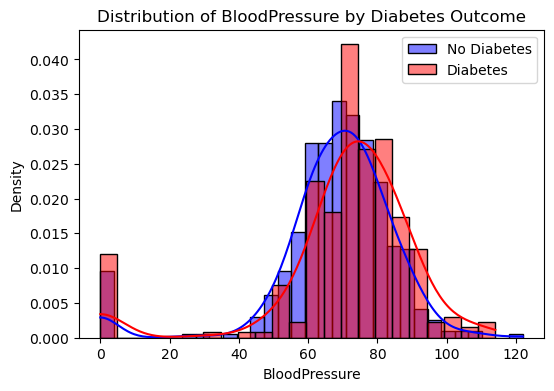

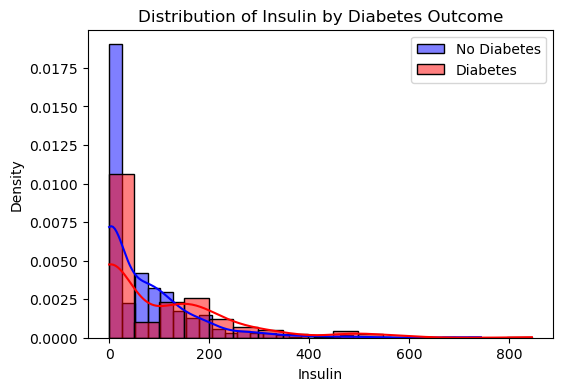

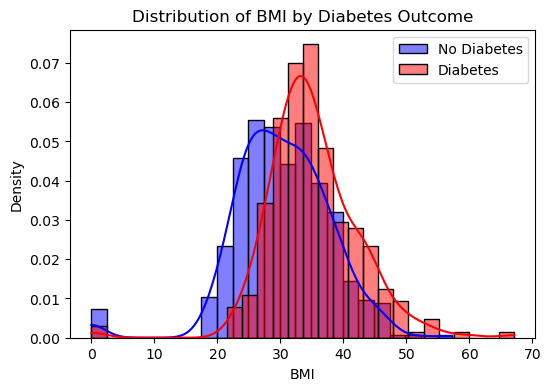

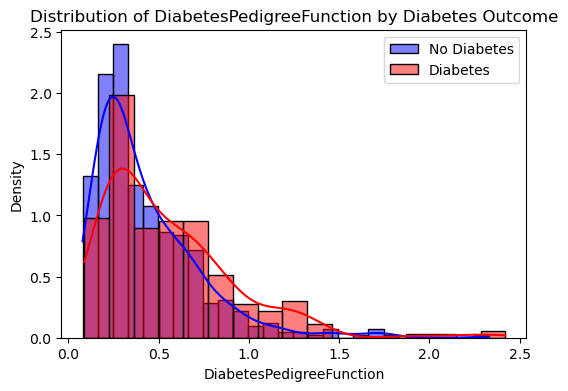

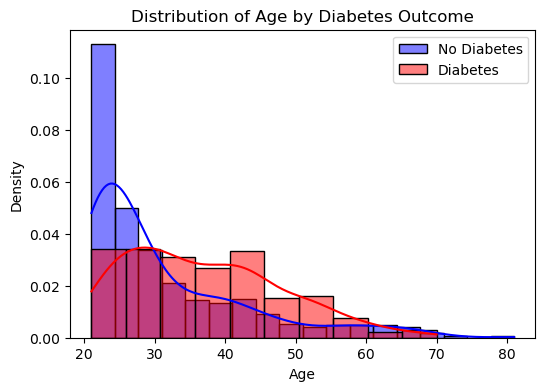

In [ ]:
# see how fearure are distributed 
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[df['Outcome'] == 0][feature], kde=True, color='blue', label='No Diabetes', stat='density')
    sns.histplot(df[df['Outcome'] == 1][feature], kde=True, color='red', label='Diabetes', stat='density')
    plt.title(f'Distribution of {feature} by Diabetes Outcome')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


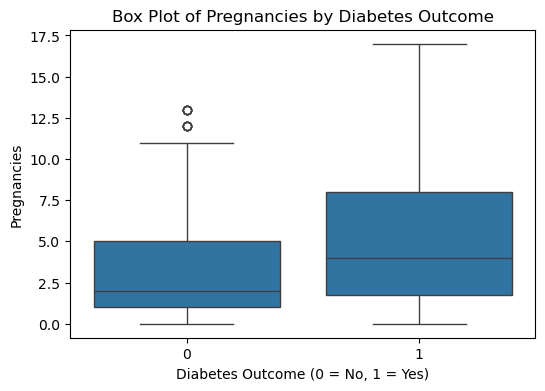

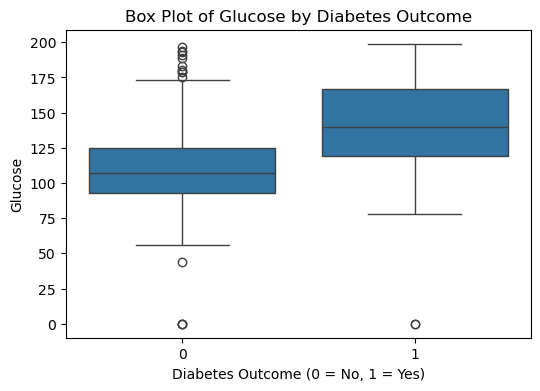

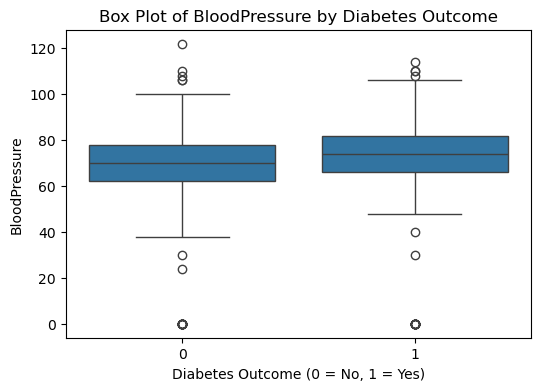

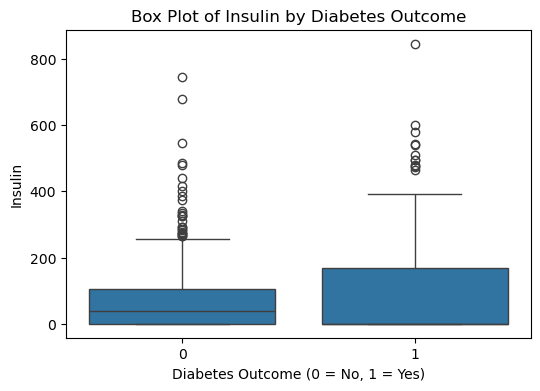

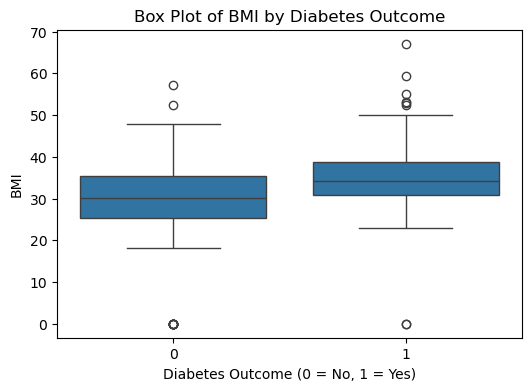

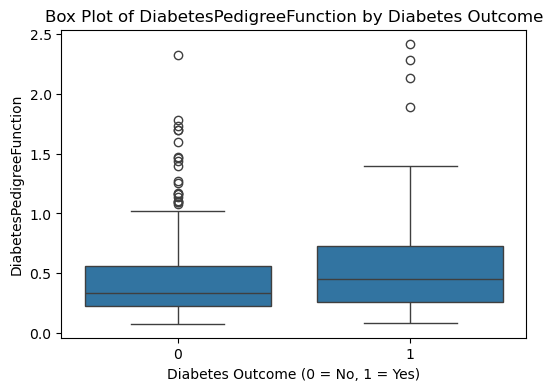

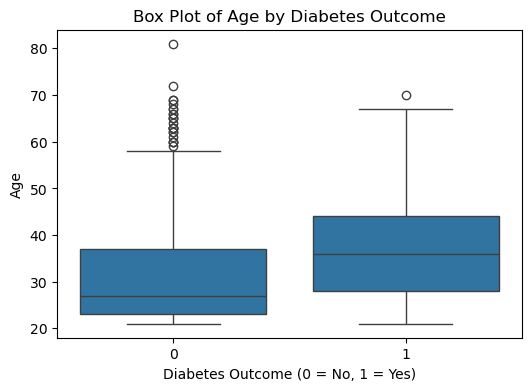

In [18]:
# box plot to check for outliers
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Diabetes Outcome')
    plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

In [20]:
# train the model
# split the data into features and target variable
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# now we can train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# awasome now we can make predictions
y_preds = model.predict(X_test)





In [24]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_preds))
conf_matrix = confusion_matrix(y_test, y_preds)
accuracy = accuracy_score(y_test, y_preds)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report(y_test, y_preds)}')


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Accuracy: 0.73
Confusion Matrix:
[[78 21]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



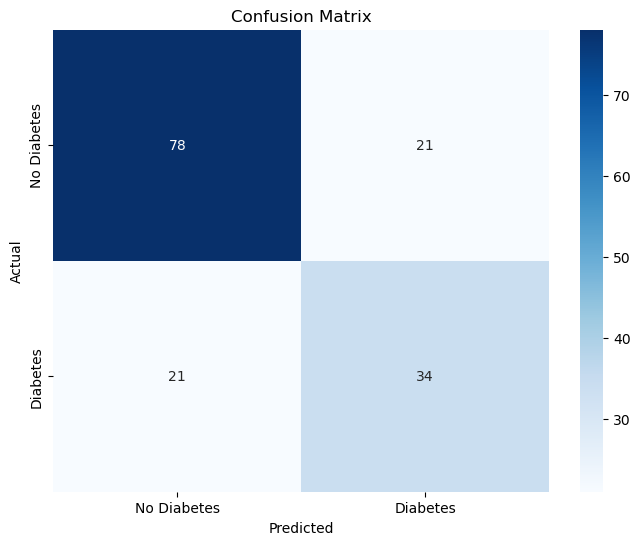

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# save the model
import joblib
joblib.dump(model, '../models/diabetes_model.pkl')

['models/diabetes_model.pkl']